# Car Sales Project

## Importing Libraries


In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = UserWarning )

## Loading the data

In [3]:
file = r"D:\1.04.+Real-life+example.csv"
raw_data = pd.read_csv(file)

# Let's explore the top 5 rows of the df
raw_data.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Describing the data

In [4]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dropping Model

In [5]:
# Model have too many unique values and 
data = raw_data.drop(['Model'],axis=1)

# Checking the descriptives without 'Model'
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [6]:
# Checking total missing values
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
# Dropping all missing values
data_no_mv = data.dropna(axis=0)
# Checking descriptives without the missing values
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring Partial Distribution Function(PDF)

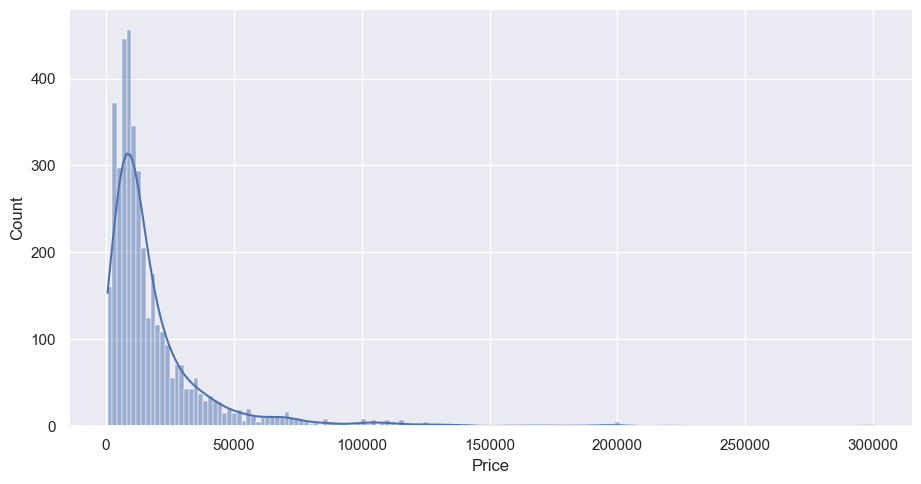

In [8]:
# The PDF will show us that how variable are distributed and help find anomalies
sns.displot(data_no_mv['Price'], kde = True, aspect = 15/8)

## Dealing with Outliers


In [9]:
# Removing top 1%
# Declar1ing a variable that will be equal to the 99th percentile of the 'Price' variable
q = data_no_mv['Price'].quantile(0.99)
# New data which excludes top 1%(i.e. without anomalies)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


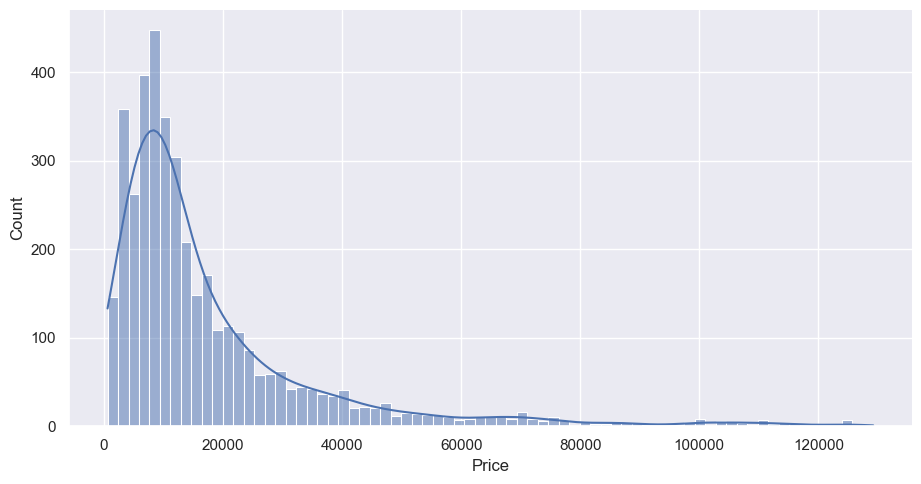

In [10]:
# Checking new plot distribution
# however, there are much fewer outliers
sns.displot(data_1['Price'], kde = True, aspect = 15/8)

In [11]:
# The number of outliers have been reduced

## Now for Mileage


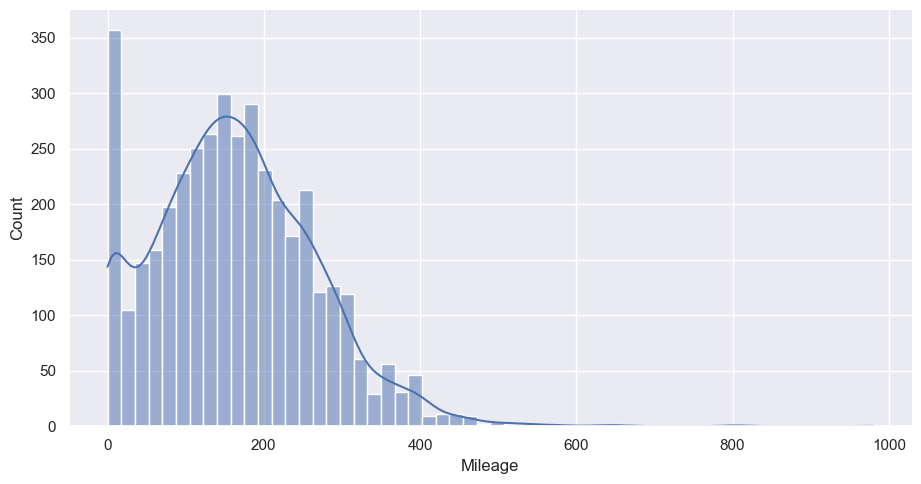

In [12]:
sns.displot(data_no_mv['Mileage'], kde = True, aspect = 15/8)

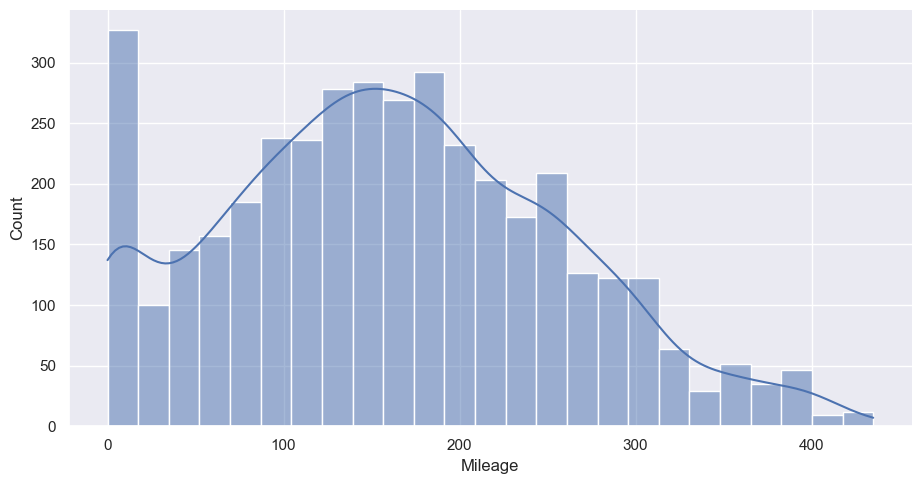

In [13]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]
sns.displot(data_2['Mileage'], kde = True, aspect = 15/8)

## For Engine

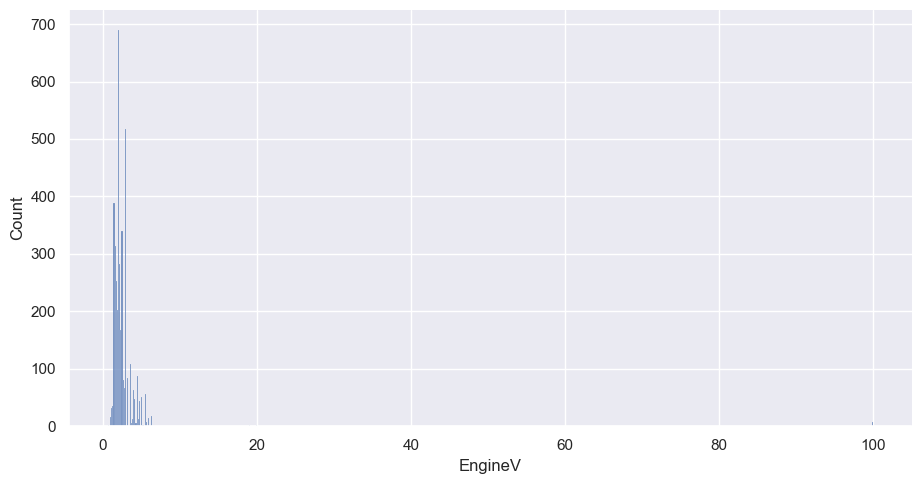

In [14]:
sns.displot(data_no_mv['EngineV'], aspect = 15/8)

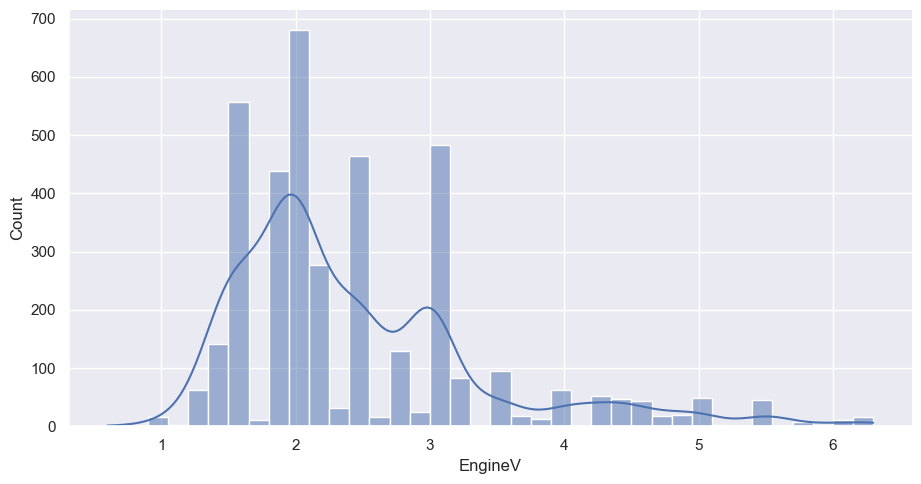

In [78]:
# Since value can't be larger than 6.5(source google)
data_3 = data_2[data_2['EngineV']<6.5]
sns.displot(data_3['EngineV'], kde = True, aspect = 15/8)

## For Year

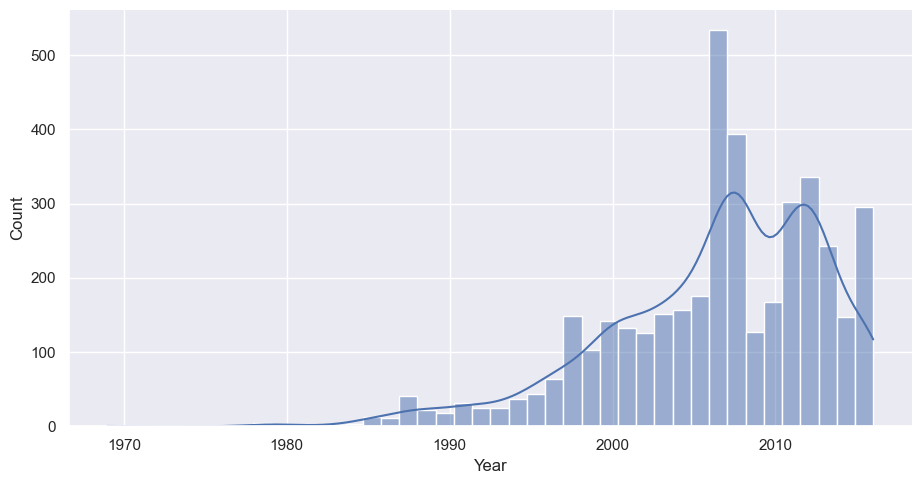

In [16]:
sns.displot(data_no_mv['Year'], kde = True, aspect = 15/8)

In [17]:
# Since outliers are on low end, remove them
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

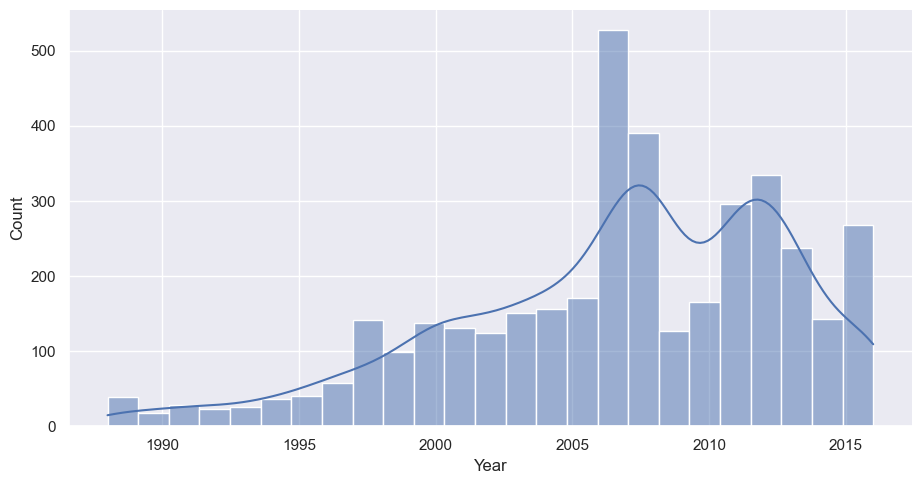

In [18]:
sns.displot(data_4['Year'], kde = True, aspect = 15/8)

## Cleaned Data

In [19]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


## Checking the OLS Assumptions

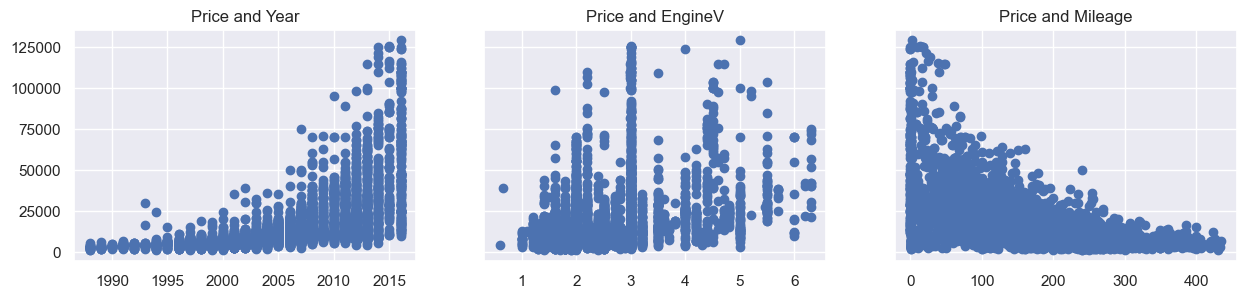

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

## Converting it into linear regression

In [21]:
# Relaxing(standardizing) by assumptions by taking log
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


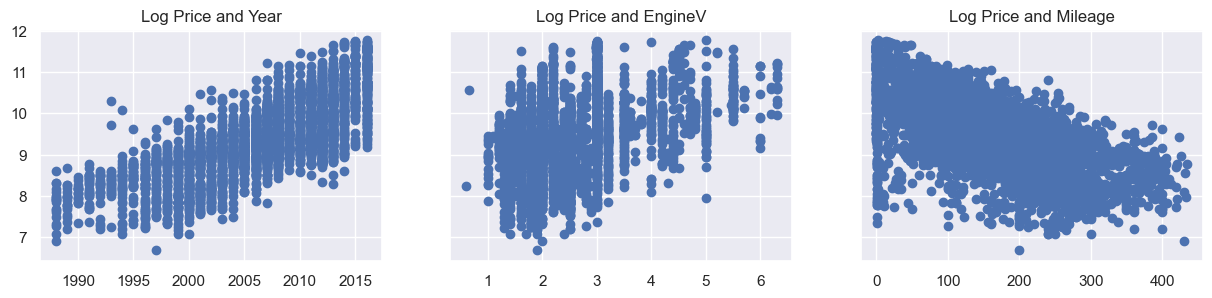

In [22]:
# Relaxed(standardized) linear plot
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')


plt.show()

In [23]:
# Dropping price
data_cleaned = data_cleaned.drop(['Price'],axis=1)

## Multicollinearity

In [24]:
# Checking Columns
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [25]:
# Using VIF to check Multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [26]:
# We are gonna drop Year as it's values dosen't lie in the range between 1 and 7

In [27]:
# Dropping year
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

# Creating Dummy Variable

In [28]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [29]:
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,427,2.9,8.974618,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,358,5.0,9.495519,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,240,4.2,10.043249,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,120,2.0,9.814656,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


In [30]:
# Rearranging columns
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [31]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [32]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,True,False,False,False,False,False,False,False,True,False,False,False,False,True,True
1,8.974618,427,2.9,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True
2,9.495519,358,5.0,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True
3,10.043249,240,4.2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True
4,9.814656,120,2.0,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True


## Linear Regression Model

In [33]:
# The target (dependent variable) is 'log price'
targets = data_preprocessed['log_price']

# The inputs are everything except the dependent variable, so we can simply drop it
inputs = data_preprocessed.drop(['log_price'],axis=1)

## Scale the data

In [34]:
# Importing the scaling module
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()
# Fit the inputs (to calculate the mean and standard deviation feature-wise)
scaler.fit(inputs)

StandardScaler()

In [35]:
# Scale the features and store them in a new variable
inputs_scaled = scaler.transform(inputs)

## Train Test Split

In [36]:
# Import the module for the split
from sklearn.model_selection import train_test_split

# spliting the variables with an 80-20 split and some random state
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

## Creating Regression


In [37]:
# Creating a linear regression object
reg = LinearRegression()
# Fitting the regression with the scaled TRAIN inputs and targets
reg.fit(x_train,y_train)
y_hat = reg.predict(x_train)

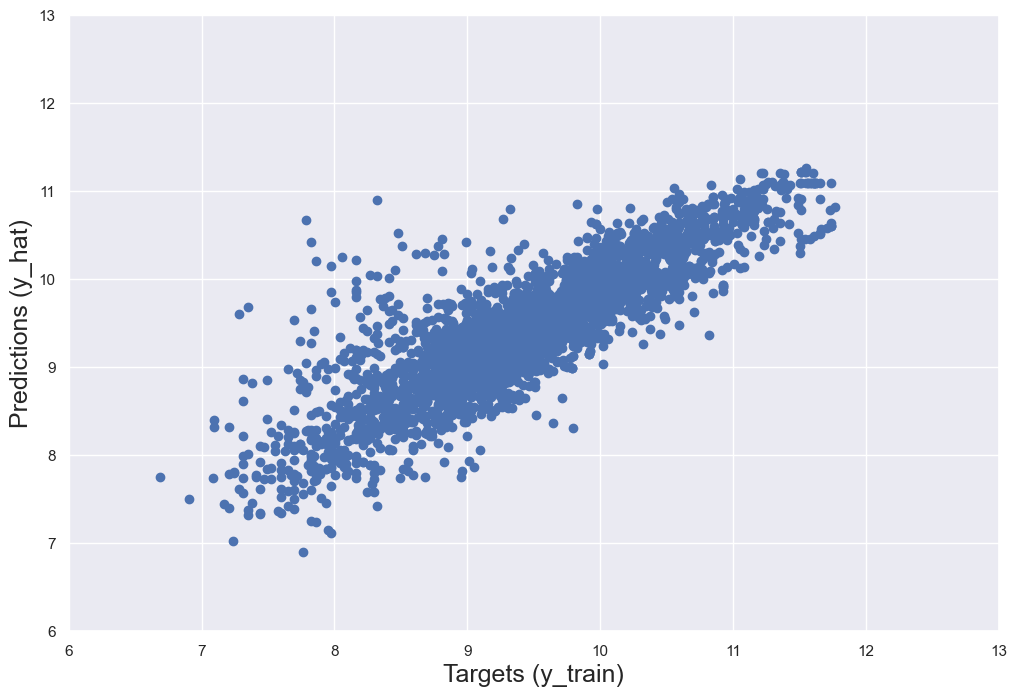

In [38]:
# Plotting y_hat and y_train
plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

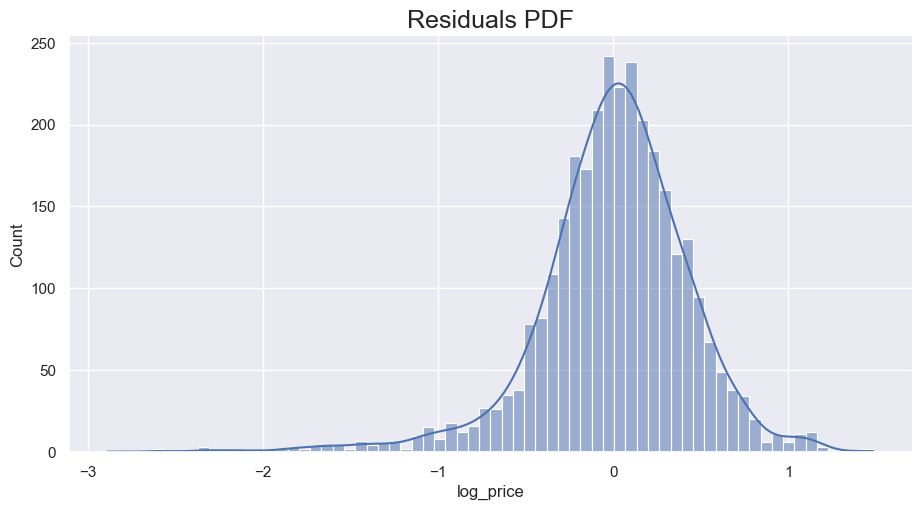

In [39]:
# Plotting the PDF of the residuals and check for anomalies
sns.displot(y_train - y_hat, kde = True, aspect = 15/8)
plt.title("Residuals PDF", size=18)

## Checking R-Squared

In [40]:
# Find the R-squared of the model
reg.score(x_train,y_train)

# in other words... find the Adjusted R-squared to have the appropriate measure :)

0.744996578792662

In [41]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [42]:
# Creating a regression summary where we can compare them with one-another
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [43]:
# Checking the different categories in the 'Brand' variable
data_cleaned['Brand'].unique()

# In this way we can see which 'Brand' is actually the benchmark

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [44]:
#BMW is the benchmark

## Testing

In [45]:
# Our test inputs are 'x_test', while the outputs: 'y_test' 
# If the predictions are far off, we will know that our model overfitted
y_hat_test = reg.predict(x_test)

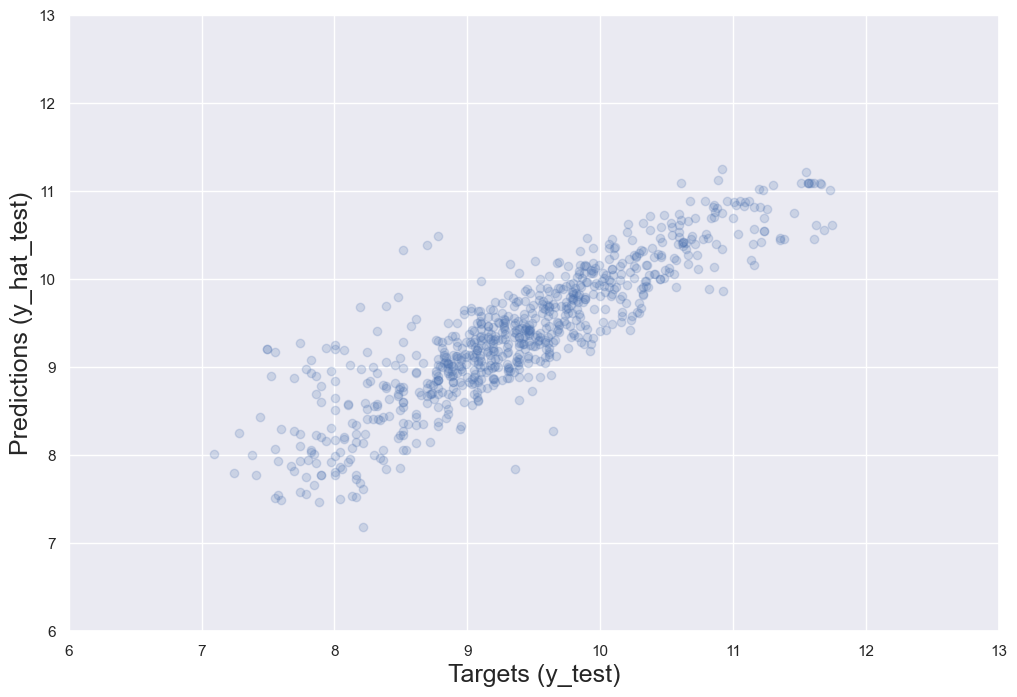

In [46]:
# Scatter plot with the test targets and the test predictions
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [47]:
# Manually checking these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075


In [48]:
# Adding test targets in that data frame
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
...,...,...
769,29651.726363,6950.0
770,10732.071179,NaN
771,13922.446953,NaN
772,27487.751303,NaN


In [49]:
# There are many missing values

In [50]:
# After displaying y_test, we find what the issue is
# The code was: data_cleaned = data_4.reset_index(drop=True)
# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    7.740664
1    7.937375
2    7.824046
3    8.764053
4    9.121509
Name: log_price, dtype: float64

In [51]:
# Overwrite the 'Target' column with the appropriate values
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
...,...,...
769,29651.726363,29500.0
770,10732.071179,9600.0
771,13922.446953,18300.0
772,27487.751303,68500.0


In [52]:
# Calculate the difference between the targets and the predictions
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [53]:
# Finally, it makes sense to see how far off we are from the result percentage-wise
# Here, we take the absolute difference in %, so we can easily order the data frame
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
...,...,...,...,...
769,29651.726363,29500.0,-151.726363,0.514327
770,10732.071179,9600.0,-1132.071179,11.792408
771,13922.446953,18300.0,4377.553047,23.921055
772,27487.751303,68500.0,41012.248697,59.871896


In [54]:
# Exploring the descriptives here gives us additional insights
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [55]:
pd.options.display.max_rows = 999
# Moreover, to make the dataset clear, we can display the result with only 2 digits after the dot 
pd.set_option('display.float_format', lambda x: '%.2f' % x)
# Finally, we sort by difference in % and manually check the model
df_pf.sort_values(by=['Difference%'])
df_pf.head()

,Prediction,Target,Residual,Difference%
0,10685.50,2300.00,-8385.50,364.59
1,3499.26,2800.00,-699.26,24.97
2,7553.29,2500.00,-5053.29,202.13
3,7463.96,6400.00,-1063.96,16.62
4,11353.49,9150.00,-2203.49,24.08


# Imprvoing Model


## Removing outliers from EngineV as its value cant excede 8.4

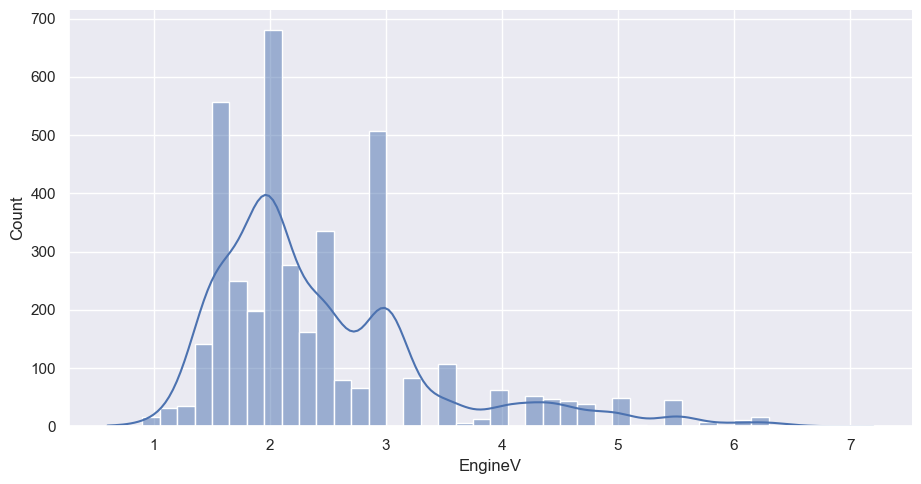

In [56]:
data_3 = data_2[data_2['EngineV']<8.4]
sns.displot(data_3['EngineV'], kde = True, aspect = 15/8)

## Removing 0.5% from Year insted of 1%

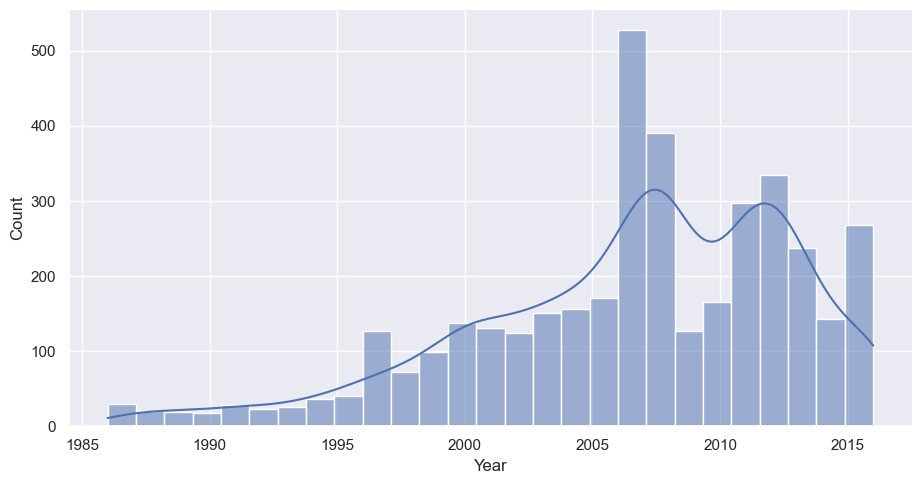

In [57]:
q = data_3['Year'].quantile(0.005)
data_4 = data_3[data_3['Year']>q]
sns.displot(data_4['Year'], kde = True, aspect = 15/8)

## OLS of Cleaned data


In [58]:
y = data_cleaned["log_price"]
x1 = data_cleaned[["Mileage","Year","EngineV"]]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()

In [59]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     3912.
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:08:50   Log-Likelihood:                -2278.7
No. Observations:                3867   AIC:                             4565.
Df Residuals:                    3863   BIC:                             4591.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -176.6204      3.316    -53.266      0.000    -183.121    -170.119
Mileage       -0.0014      0.000    -13.724      0.000      -0.002      -0.001
Year           0.0923      0.002     56.097      0.000       0.089       0.096
EngineV        0.3932      0.007     53.162      0.000       0.379       0.408
==============================================================================
Omnibus:                       28.313   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.120
Skew:                          -0.194   Prob(JB):                     4.75e-07
Kurtosis:                       3.173   Cond. No.                     9.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
# Checking for multicollinearity
variables1 = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.79,Mileage
1,10.35,Year
2,7.66,EngineV


In [61]:
# Since year is important as it tell us a lot of details we wont remove it, instead we will remove EngineV which also have very high value
#data_no_multicollinearity = data_cleaned.drop(['EngineV'],axis = 1)

In [62]:
# Checking for multicollinearity again(without EngineV)
variables = data_cleaned[['Mileage','Year',]]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.79,Mileage
1,3.79,Year


In [63]:
# There is a significant improvemnt in Multicollinearity

In [64]:
# Checking OLS table
y = data_cleaned["log_price"]
x1 = data_cleaned[["Mileage","Year"]]
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     2573.
Date:                Thu, 22 Aug 2024   Prob (F-statistic):               0.00
Time:                        11:08:50   Log-Likelihood:                -3340.3
No. Observations:                3867   AIC:                             6687.
Df Residuals:                    3864   BIC:                             6705.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -171.6077      4.361    -39.350      0.000    -180.158    -163.058
Mileage       -0.0015      0.000    -10.935      0.000      -0.002      -0.001
Year           0.0903      0.002     41.717      0.000       0.086       0.095
==============================================================================
Omnibus:                       34.853   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.744
Skew:                          -0.051   Prob(JB):                     6.98e-06
Kurtosis:                       2.630   Cond. No.                     9.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [65]:
# Since the value of R-squared and Adj.R-squared worsened by ~18% we wont remove EngineV

## Creating Dummies

In [66]:
data_with_dummies = pd.get_dummies(data_cleaned)
data_with_dummies.head()

,Mileage,EngineV,Year,log_price,Brand_Audi,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,...,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Diesel,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_no,Registration_yes
0,277,2.00,1991,8.34,False,True,False,False,False,False,...,False,True,False,False,False,False,False,True,False,True
1,427,2.90,1999,8.97,False,False,True,False,False,False,...,False,False,False,True,True,False,False,False,False,True
2,358,5.00,2003,9.50,False,False,True,False,False,False,...,False,True,False,False,False,True,False,False,False,True
3,240,4.20,2007,10.04,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,120,2.00,2011,9.81,False,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,True


In [67]:
data_with_dummies2 = data_with_dummies.drop(['Brand_Volkswagen','Body_sedan','Engine Type_Diesel','Registration_yes'], axis=1)                    

In [68]:
print(data_with_dummies2.dtypes)

Mileage                  int64
EngineV                float64
Year                     int64
log_price              float64
Brand_Audi                bool
Brand_BMW                 bool
Brand_Mercedes-Benz       bool
Brand_Mitsubishi          bool
Brand_Renault             bool
Brand_Toyota              bool
Body_crossover            bool
Body_hatch                bool
Body_other                bool
Body_vagon                bool
Body_van                  bool
Engine Type_Gas           bool
Engine Type_Other         bool
Engine Type_Petrol        bool
Registration_no           bool
dtype: object


## Creating Linear Regression

In [69]:
targets = data_with_dummies2['log_price']
inputs = data_with_dummies2.drop(['log_price'],axis=1)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [72]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_hat = reg.predict(x_train)

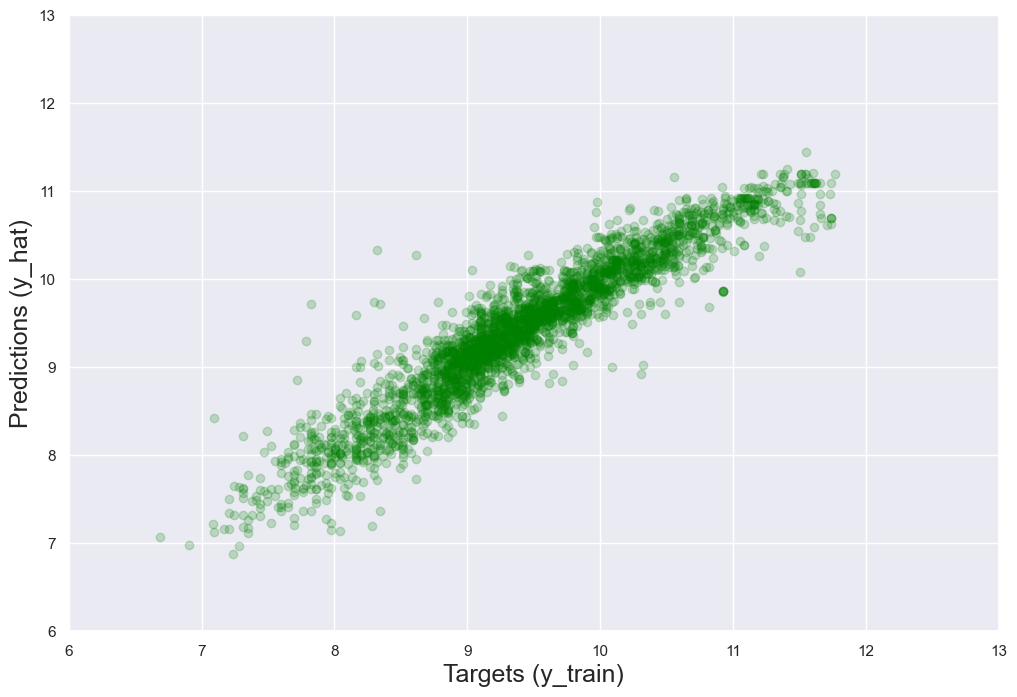

In [73]:
plt.figure(figsize=(12, 8))
plt.scatter(y_train, y_hat,alpha = 0.2,c = 'green')
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

## Finding the Adj. R-squared

In [74]:
x_train.shape

(3093, 18)

In [75]:
reg.score(x_train,y_train)*100

88.49485492094938

In [86]:
Improvement =round((0.8849485492094937-0.744996578792662)*100,2)
Improvement

14.0

## Final Result:
### After adjusting data the accuracy of model increased by 14%